<a href="https://colab.research.google.com/github/bballdave025/job-app-word-freq/blob/polished-5part-presented/Part_05_NLPPresentationJobHunt_DemoWordFreq_p5pp_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job-Hunt NLP Demo - Part 5

Which demo will also be useful in doing some quick NLP work to see how my résumé's word distribution matches that from job descriptions.

There's a wonderful project out there, [MyBinder](https://mybinder.org), which allows you to interactively run a Jupyter notebook completely online. It's nice to have when you'd like to play with code and see better the outputs that come from running that code. I've had some problems with images going down, but I'm going to work to keep this one up.

The link to the online, interactive notebook - the binder - is at the badge you see right here

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/polished-5part-presented?labpath=Part_04_NLPPresentationJobHunt_DemoWordFreq.ipynb)

<hr/>

## We are calling this version 0.1.003

It's the FamilySearch CJKV jobs applied for in August 2023, but we're splitting it into smaller notebooks. Hopefully, MyBinder can load each more quickly. We'll see how things work with pickling variables between the parts.

**Edit:** It worked pretty well.

<hr/>

## What we are doing in Part 5

First of all, let's give you a MyBinder badge link which specifies the version and the part.

[![Binder](https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/badge_logo_dwb_v_0-1-003_part_5.png?raw=1)](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/polished-5part-presented?labpath=Part_05_NLPPresentationJobHunt_DemoWordFreq.ipynb)

@TODO : put a few whatchamacallits about what we're doing in Part 5.

<hr/>

## Let's start by un-pickle-ing the things we'll need.

In [1]:
import pickle

pickle_filename_4_to_5 = "important_part_4_vars.pkl"

unpickled_array = []

with open(pickle_filename_4_to_5, 'rb') as pfh:
    unpickled_array = pickle.load(pfh)
##endof:  with open ... as pfh # (pickle file handle)

In [2]:
local_job_desc_filenames = unpickled_array[0]
local_job_appl_filenames = unpickled_array[1]
description_word_counts = unpickled_array[2]
application_word_counts = unpickled_array[3]
list_of_display_table_desc = unpickled_array[4]

## Details for All 25 Top Words (Both documents) and Metrics

### First, a review of where we've been @TODO

@TODO Review what we've done.

Good things are what we've done.

From our previous stuff, there are some nice functions that we're just copying and pasting, because it seems transferring functions via pickle file is a nightmare. A lot of them are shorter, without the `print_details` types of parameters. We've already seen these, so feel free to <kbd>Shift</kbd> + <kbd>Enter</kbd> your way through the functions.

## Previous functions

In [3]:
def get_description_word_at_rank(this_rank = 1,
                                 this_desc_fname_idx=0
                                ):
    this_idx = this_rank # the header is index 0
    this_table_to_use = \
      list_of_display_table_desc[this_desc_fname_idx]
    this_word = this_table_to_use[this_rank][0]

    return this_word
##endof:  get_description_word_at_rank(<params>)

In [4]:
def get_application_word_at_rank(this_rank = 1):
    this_idx = this_rank # the header is index 0
    this_appl_fname_idx=0
    this_table_to_use = \
      list_of_display_table_appl[this_appl_fname_idx]
    this_word = this_table_to_use[this_rank][0]

    return this_word
##endof:  get_description_word_at_rank(<params>)

In [5]:
def find_word_in_both_display_lists(word_to_find,
                                    display_list_1_description,
                                    display_list_2_application,
                                    name_of_display_list_1=None,
                                    name_of_display_list_2=None,
                                   ):
    index_count_1 = 0 # skip header
    index_for_found_in_1 = 0

    word_found_in_1 = False
    for my_entry_1 in display_list_1_description:
        index_count_1 += 1
        if my_entry_1 == word_to_find:
            word_found_in_1 = True
            index_for_found_in_1 = index_count_1
            break
        ##endof:  if my_entry_1 == word_to_find
    ##endof:  for my_entry_1 in display_list_1

    index_count_2 = 0 # skip header
    index_for_found_in_2 = -1
    word_found_in_2 = False
    for my_entry_2 in display_list_2_application:
        index_count_2 += 1
        if my_entry_2 == word_to_find:
            word_found_in_2 = True
            index_for_found_in_2 = index_count_2
            break
        ##endof:  if my_entry_2 == word_to_find
    ##endof:  for my_entry_1 in display_list_1

    to_return_found_1 = None

    if word_found_in_1:
        to_return_found_1 = index_for_found_in_1 # - 1
    ##endof:  if word_found_in_1

    to_return_found_2 = None

    if word_found_in_2:
        to_return_found_2 = index_for_found_in_2 # - 1
    ##endof:  if word_found_in_2

    return to_return_found_1, to_return_found_2

##endof:  find_word_in_both_lists

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## Next line only for Jupyter notebook.
%matplotlib inline

def get_freq_histo_specific(word_count_ordered_dict_1,
                            rank_index_1 = 1,
                            n_surrounding_words = 3,
                            do_show_frac_not_count=True,
                            ylim_bottom_val=None,
                            ylim_top_val=None,
                            ax1=None,
                            do_show_word_and_count_lists=False,
                           ):
    '''
    @return  an axis from matplotlab (with the object - histogram - in it)
    '''

    do_debug_histo_center = True

    if ax1 is None:
        fig = plt.figure(figsize=(10, 3))
        ax1 = fig.add_subplot(111)
    ##endof:  if ax1 is None

    counts_pre = None
    fractions_pre = None

    if do_show_frac_not_count:
        frac_wd_cnt_list_of_tuples = \
          [ ( k, (v / len(word_count_ordered_dict_1)) )
                  for k, v in word_count_ordered_dict_1.items() ]
        fractions_pre = [ this_item[1]
                           for this_item in frac_wd_cnt_list_of_tuples ]
    else:
        counts_pre = list(word_count_ordered_dict_1.values())
    ##endof:  if/else do_show_frac_not_count

    words_pre  = list(word_count_ordered_dict_1.keys())

    if do_debug_histo_center:
        print(f"words_pre: {words_pre}")
    ##endof:  if do_debug_histo_center

    counts = None
    fractions = None

    # Pad the list with zero-count and empty-set characters
    len_lists = 2 * n_surrounding_words + 1

    if do_show_frac_not_count:
        fractions = [0] * len_lists
    else:
        counts = [0] * len_lists
    ##endof:  if/else do_show_frac_not_count

    words  = ["\u2205"] * len_lists # empty-set glyph codepoint

    if do_debug_histo_center:
        print(f"words: {words}")
    ##endof:  if do_debug_histo_center

    #  Fill anything with a valid index with the corresponding
    #+ word/count

    current_output_index = -1

    min_i = rank_index_1 - n_surrounding_words - 1
    max_i = rank_index_1 + n_surrounding_words

    for i in range(min_i, max_i):
        current_output_index += 1

        if do_debug_histo_center:
            print(f"i: {i}")
            print(f"current_output_index: {current_output_index}")
        ##endof: if do_debug_histo_center

        if i < 0:
            pass
        else:
            if do_show_frac_not_count:
                fractions[current_output_index] = fractions_pre[i]
            else:
                counts[current_output_index] = counts_pre[i]
            ##endof:  if/else do_show_frac_not_count

            words[current_output_index] = words_pre[i]

        ##endof:  if/else i < 1

        if do_debug_histo_center:
            print(f"words: {words}")
            print(f"counts: {counts}")
            print(f"fractions: {fractions}")
        ##endof:  if do_debug_histo_center

    ##endof:  for i in range

    ## the text version of the info
    if do_show_word_and_count_lists:
        if do_show_frac_not_count:
            print(f"fractions: {fractions}")
        else:
            print(f"counts: {counts}")
        ##endof:  if/else do_show_frac_not_count

        print(f"words:  {words}")
    ##endof:  if do_show_word_and_count_lists

    x_words_coords = np.arange(len(words))

    if do_show_frac_not_count:
        ax1.bar(x_words_coords, fractions, align='center')
    else:
        ax1.bar(x_words_coords, counts, align='center')
    ##endof:  if/else do_show_frac_not_count

    ax1.set_xticks(x_words_coords)
    ax1.set_xticklabels(words, rotation=45, ha='right')

    ax1.set_ylim(ylim_bottom_val, ylim_top_val)

##endof:  get_freq_histo_specific

In [7]:
from scipy.special import polygamma
  #  I needed to pip install scipy. I'll update
  #+ the instructions and the environment.

def max_probability_for_graph(n_distinct_words,
                              this_rank=1,
                              do_show_intermediates=False):
    beta = 2.7

    approx_sum = (
          polygamma(0, beta + n_distinct_words + 1)
        - polygamma(0, beta)
    )

    if do_show_intermediates:
        print()
        print(f"To check, approx_sum = {approx_sum}")
    ##endof:  if do_show_intermediates

    kappa = approx_sum / n_distinct_words

    if do_show_intermediates:
        print()
        print(f"To check, kappa = {kappa}")
        print()
    ##endof:  if do_show_intermediates

    calculated_proportion = (   ( 1 / (kappa * n_distinct_words) )
                              * ( 1 / (this_rank + beta) )
                           )

    return calculated_proportion

##endof:  max_probability_for_graph(n_distinct_words)


def kappa_by_partial_sum_terms(n_distinct_words,
                               do_show_intermediates=False):
    '''
    To check my implementation of Euler-Maclaurin
    '''

    beta = 2.7
    term_by_term_sum = 0

    for r in range(n_distinct_words):
        this_term = 1 / ( r + beta)
        term_by_term_sum += this_term
    ##endof:  for r in range(n_distinct_words)

    if do_show_intermediates:
        print()
        print(f"To check, term_by_term_sum = {term_by_term_sum}")
    ##endof:  if do_show_intermediates

    kappa = term_by_term_sum / n_distinct_words

    if do_show_intermediates:
        print()
        print(f"To check, kappa = {kappa}")
        print()
    ##endof:  if do_show_intermediates

    return kappa

##endof:  kappa_by_partial_sum_terms(n_distinct_words)

## End of Functions

### Stop the <kbd>Shift</kbd> + <kbd>Enter</kbd> Madness

# STOP

## The functions are Loaded

## We are at a place you probably want to see

## Okay, I hope you've stopped.

## Now, we can see the good stuff

<hr/>
<hr/>
<hr/>


# This is where the good stuff will go

And you know this stuff will be good.

<hr/>
<hr/>
<hr/>

## Just Need This Once

In [9]:
description_idx_to_show = 0 # For this version, can be 0,1,2,3
desc_fname_idx_to_show = description_idx_to_show

n_desc_words_array = [0] * len(description_word_counts)

for i in range(0, len(description_word_counts)):
    n_desc_words_array[i] = \
      len(description_word_counts[i])
##endof:  for i in range(len)

In [10]:
do_change_ymax = False

error_bars_frac = 0.1

theoretical_max_values = [0] * len(description_word_counts)

for desc_index in range(len(description_word_counts)):
    theoretical_max_values[desc_index] = \
      max_probability_for_graph(
        n_distinct_words=\
          n_desc_words_array[desc_index]
    )
##endof:  for desc_index in range(len(description_word_counts))

init_probability = \
        theoretical_max_values[desc_fname_idx_to_show]

if do_change_ymax:
    ##!! HERE IS WHERE TO CHANGE THE VALUE, IF NEEDED !!##
    init_probability = 0.05
    ##!! THERE WAS WHERE TO CHANGE THE VALUE, IF WANTED !!##
##endof:  if do_change_ymax

max_graph_proportion = init_probability * (1 + error_bars_frac)

print(f"max_graph_proportion: {max_graph_proportion}")

max_graph_proportion: 0.05949705688145124


## Now, Until I Automate (If I Automate), We'll need to go one-at-a-time

### 1st Most Frequent Word in Job Description

this_corresponding_word: software
description_word_rank_1_desc_0.png


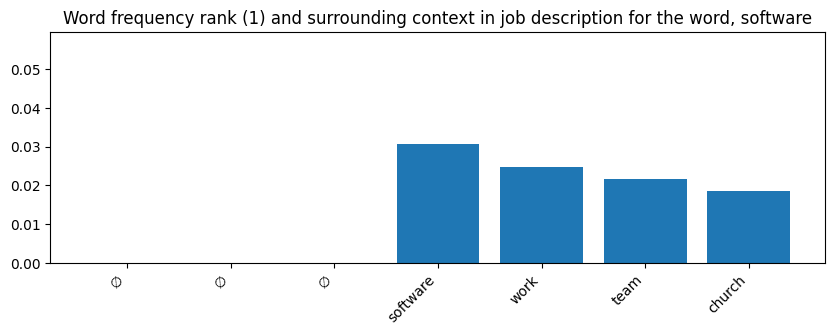

In [11]:
this_desc_idx = 0 # which job description are we using?

top_word_rank_in_desc = 1

this_corresponding_word = \
    get_description_word_at_rank(top_word_rank_in_desc)

print(f"this_corresponding_word: {this_corresponding_word}")

rank_desc, _ = find_word_in_both_display_lists(
                this_corresponding_word,
                description_word_counts[desc_fname_idx_to_show],
                application_word_counts[0],
                   #  we only have one table -
                   #+ it's at any legal index;
                   #+ let's choose 0
                name_of_display_list_1 = \
                    f"description_word_counts[{this_desc_idx}]",
                name_of_display_list_2 = "application_word_counts[0]"
)

fig_filename_desc = ""

if rank_desc is None:
    import matplotlib.image as mpimg
    fig_filename_desc = "description_word_not_found.png"
    img = mpimg.imread(fig_filename_desc)
    imgplot = plt.imshow(img)
##endof:  if rank_desc
else:
    get_freq_histo_specific(
            description_word_counts[desc_fname_idx_to_show],
            rank_index_1=this_desc_idx,
            n_surrounding_words=3,
            do_show_word_and_count_lists=False,
            ylim_top_val=max_graph_proportion
    )

    fig_filename_desc = (
            f"description_word_rank_{this_desc_idx}_"
            f"desc_{desc_fname_idx_to_show}.png"
    )

    print(fig_filename_desc)

    title_for_desc = (f"Word frequency rank ({rank_desc}) and surrounding context in "
                      f"job description for the word, {this_corresponding_word}"
                 )
    plt.title(title_for_desc)

    plt.savefig(fig_filename_desc,
                bbox_inches='tight')

    plt.show()
##endof:  if/else rank_desc

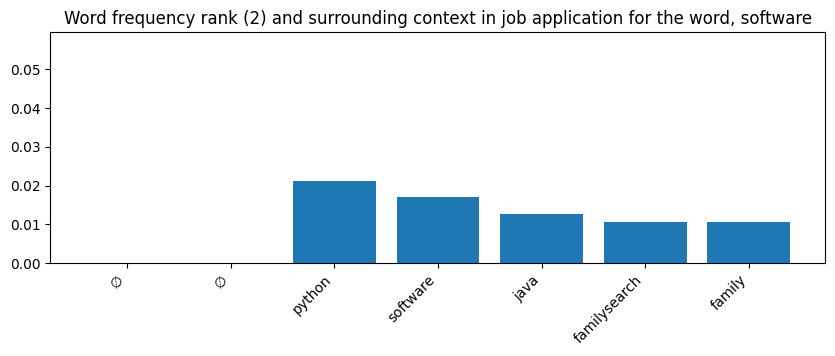

In [12]:
_, rank_appl = find_word_in_both_display_lists(
        this_corresponding_word,
        description_word_counts[desc_fname_idx_to_show],
        application_word_counts[0],
           #  we only have one table -
           #+ it's at any legal index;
           #+ let's choose 0
        name_of_display_list_1 = f"description_word_counts[{this_desc_idx}]",
        name_of_display_list_2 = "application_word_counts[0]"
)

fig_filename_appl = ""

if rank_appl is None:
    import matplotlib.image as mpimg
    fig_filename_appl = "application_word_not_found.png"
    img = mpimg.imread(fig_filename_appl)
    imgplot = plt.imshow(img)
##endof:  if rank_desc
else:
    corresponding_index = rank_appl

    get_freq_histo_specific(application_word_counts[0],
                            rank_index_1=corresponding_index,
                            n_surrounding_words=3,
                            do_show_word_and_count_lists=False,
                            ylim_top_val=max_graph_proportion
    )

    fig_filename_appl = (f"application_word_rank_{corresponding_index}_"
                         f"desc_{desc_fname_idx_to_show}.png"
                        )

    title_for_appl = (f"Word frequency rank ({rank_appl}) and surrounding context in "
                      f"job application for the word, {this_corresponding_word}"
                     )
    plt.title(title_for_appl)

    plt.savefig(fig_filename_appl,
            bbox_inches='tight')

    plt.show()
##endof:  ##endof:  if/else rank_desc

In [13]:
print("  img src values for the two images:")
print(f'"{fig_filename_desc}"')
print(f'"{fig_filename_appl}"')

print()
print("  img alt values for the two images:")
alt_text_1 = (f'"Histogram for the word, {this_corresponding_word}, in '
               'the job description text"'
             )
alt_text_2 = (f'"Histogram for the word, {this_corresponding_word}, in '
               'the job application text"'
             )
print(alt_text_1)
print(alt_text_2)

  img src values for the two images:
"description_word_rank_1_desc_0.png"
"application_word_rank_2_desc_0.png"

  img alt values for the two images:
"Histogram for the word, software, in the job description text"
"Histogram for the word, software, in the job application text"


### Change the img src values and img alt values, then see the histograms together

You might need to double-click on the image to get the html source. You also might need to click on the image (or image-not-found icon) just to make things reload.

Actually, I've found that a good way to make things re-render is to put `./` in front of the first `src="`, evaluate the cell, and then remove the `./`.

Or, for <strike>an internet-type link (hypertext transfer protocol)</strike>
a full-path link, change one
of the `/` to `//`, re-evaluate the cell, then change it back and re-evaluate.

<br/>
<div>
  <img src="https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/description_word_rank_1_desc_0.png?raw=1"
       alt="Histogram for the word, software, in the job description text"
       width="auto">
</div>
<br/>

<br/>
<div>
  <img src="https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/application_word_rank_2_desc_0.png?raw=1"
       alt="Histogram for the word, software, in the job application text"
       width="auto">
</div>
<br/>

Here's where I should take a screenshot and save it. Maybe put some nice dotted
lines connecting the 'software' bars. Then, put it in another text box. Also,
get it ready for the portfolio page.

### 2nd Most Frequent Word in Job Description

this_corresponding_word: work
words_pre: ['software', 'work', 'team', 'church', 'technical', 'engineering', 'experience', 'development', 'professional', 'role', 'product', 'programming', '+', 'seek', 'teams', 'job', 'industry', 'practices', 'position', 'areas', 'design', 'support', 'technology', 'provide', 'gospel', 'develop', 'processes', 'technologies', 'computer', 'skills', 'ability', 'dev', 'engineer', 'remote', 'united', 'states', 'needs', 'build', 'diverse', 'global', 'full-stack', 'requires', 'knowledge', 'designing', 'defining', 'implementing', 'products', 'systems', 'system', 'leader', 'project', 'planning', 'activities', 'peer', 'reviews', 'leadership', 'architecture', 'responsibilities', 'lead', 'vertical', 'multiple', 'architectures', 'best', 'participate', 'members', 'time', 'requirements', 'user', 'code', 'new', 'qualifications', 'degree', 'years', 'methodologies', 'releases', 'enterprise', 'demonstrated', 'abilities', 'create', 'direct', 'overall', 'principles', 'logic',

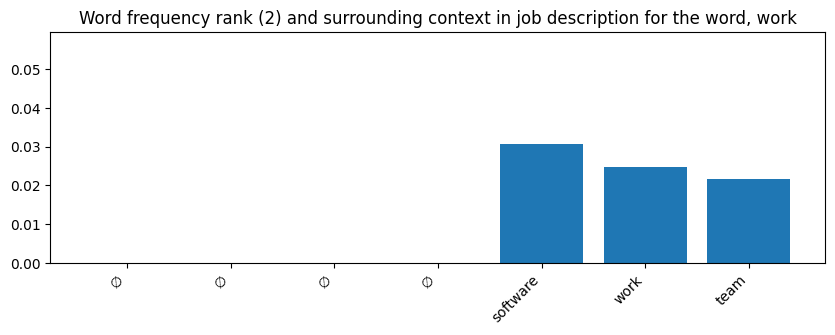

In [18]:
this_desc_idx = 0 # which job description are we using?

###############################################
word_rank_in_desc = 2
###############################################

this_corresponding_word = \
    get_description_word_at_rank(word_rank_in_desc)

print(f"this_corresponding_word: {this_corresponding_word}")

rank_desc, _ = find_word_in_both_display_lists(
                this_corresponding_word,
                description_word_counts[desc_fname_idx_to_show],
                application_word_counts[0],
                   #  we only have one table -
                   #+ it's at any legal index;
                   #+ let's choose 0
                name_of_display_list_1 = \
                    f"description_word_counts[{this_desc_idx}]",
                name_of_display_list_2 = "application_word_counts[0]"
)

fig_filename_desc = ""

if rank_desc is None:
    import matplotlib.image as mpimg
    fig_filename_desc = "description_word_not_found.png"
    img = mpimg.imread(fig_filename_desc)
    imgplot = plt.imshow(img)
##endof:  if rank_desc
else:
    get_freq_histo_specific(
            description_word_counts[desc_fname_idx_to_show],
            rank_index_1=this_desc_idx,
            n_surrounding_words=3,
            do_show_word_and_count_lists=False,
            ylim_top_val=max_graph_proportion
    )

    fig_filename_desc = (
            f"description_word_rank_{this_desc_idx}_"
            f"desc_{desc_fname_idx_to_show}.png"
    )

    print(fig_filename_desc)

    title_for_desc = (f"Word frequency rank ({rank_desc}) and surrounding context in "
                      f"job description for the word, {this_corresponding_word}"
                 )
    plt.title(title_for_desc)

    plt.savefig(fig_filename_desc,
                bbox_inches='tight')

    plt.show()
##endof:  if/else rank_desc

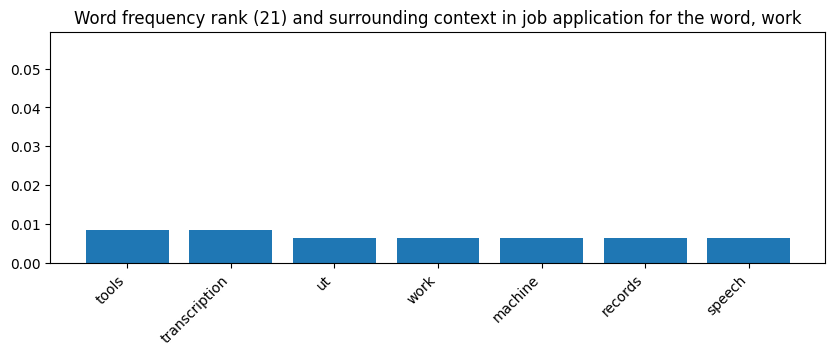

In [15]:
_, rank_appl = find_word_in_both_display_lists(
        this_corresponding_word,
        description_word_counts[desc_fname_idx_to_show],
        application_word_counts[0],
           #  we only have one table -
           #+ it's at any legal index;
           #+ let's choose 0
        name_of_display_list_1 = f"description_word_counts[{this_desc_idx}]",
        name_of_display_list_2 = "application_word_counts[0]"
)

fig_filename_appl = ""

if rank_appl is None:
    import matplotlib.image as mpimg
    fig_filename_appl = "application_word_not_found.png"
    img = mpimg.imread(fig_filename_appl)
    imgplot = plt.imshow(img)
##endof:  if rank_desc
else:
    corresponding_index = rank_appl

    get_freq_histo_specific(application_word_counts[0],
                            rank_index_1=corresponding_index,
                            n_surrounding_words=3,
                            do_show_word_and_count_lists=False,
                            ylim_top_val=max_graph_proportion
    )

    fig_filename_appl = (f"application_word_rank_{corresponding_index}_"
                         f"desc_{desc_fname_idx_to_show}.png"
                        )

    title_for_appl = (f"Word frequency rank ({rank_appl}) and surrounding context in "
                      f"job application for the word, {this_corresponding_word}"
                     )
    plt.title(title_for_appl)

    plt.savefig(fig_filename_appl,
            bbox_inches='tight')

    plt.show()
##endof:  ##endof:  if/else rank_desc

In [16]:
print("  img src values for the two images:")
print(f'"{fig_filename_desc}"')
print(f'"{fig_filename_appl}"')

print()
print("  img alt values for the two images:")
alt_text_1 = (f'"Histogram for the word, {this_corresponding_word}, in '
               'the job description text"'
             )
alt_text_2 = (f'"Histogram for the word, {this_corresponding_word}, in '
               'the job application text"'
             )
print(alt_text_1)
print(alt_text_2)

  img src values for the two images:
"description_word_rank_0_desc_0.png"
"application_word_rank_21_desc_0.png"

  img alt values for the two images:
"Histogram for the word, work, in the job description text"
"Histogram for the word, work, in the job application text"


### Change the img src values and img alt values, then see the histograms together

You might need to double-click on the image to get the html source. You also might need to click on the image (or image-not-found icon) just to make things reload.

Actually, I've found that a good way to make things re-render is to put `./` in front of the first `src="`, evaluate the cell, and then remove the `./`.

Or, for a full-path link, change one of the `/` to `//`, re-evaluate the cell, then change it back and re-evaluate.

<br/>
<div>
  <img src="https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/#copy-in#.png?raw=1"
       alt="#copy-in#"
       width="auto">
</div>
<br/>

<br/>
<div>
  <img src="https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/#copy-in#?raw=1"
       alt="#copy-in#"
       width="auto">
</div>
<br/>

Here's where I should take a screenshot and save it. Maybe put some nice dotted
lines connecting the '#word#' bars. Then, put it in another text box. Also,
get it ready for the portfolio page.

## 3rd Most Frequent Word in Job Description

## 4th Most Frequent Word in Job Description

## 5th Most Frequent Word in Job Description

## Output for Description and Application:

### Oh, I did this above

### <strike>&lt;FILL THIS IN&gt;</strike>

@TODO : I need to look at what I've done here in previous versions.

### Done

In [ ]:
# #######################
# # No need to run again
# #####
# !powershell -c (Get-Date -UFormat "%s_%Y%m%dT%H%M%S%Z00") -replace '[.][0-9]*_', '_'

The output when I actually did this was

```
1693128500_20230827T092820-0600
```

## Future Steps

- Look at ranking, counts, percentage, etc. for FamilySearch's (job description's) top 25 words as found in my (job application's) word counts, then vice-versa.
  - Code setup completed 2023-08-20. Putting all 25 in would make a very busy display, so I just did a few.
- Get rid of words that are necessary for grammar, but which don't matter too much in determining whether the two documents match up. (Found term on 2023-08-07. It's "stopwords".)
  - Completed 2023-08-09

**Some new future steps**

- Do word counts for the pair of top 25, but then also do the fraction each word comprises of the whole (non-stopword) text.
  - Completed sometime before 2023-08-27